In [1]:
from math import comb

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import binom

plt.rc("text", usetex=True)

In [2]:
n = 10_000
iters = 10_000

# Empirical

counts_list = []
max_len = 0
for it in tqdm(range(iters)):
    x = np.random.choice(n, n, replace=True)
    c = np.bincount(np.bincount(x))
    counts_list.append(c)
    if c.size > max_len:
        max_len = c.size
        
for it, counts in enumerate(tqdm(counts_list)):
    counts_list[it] = np.pad(counts, (0, max_len - len(counts)), mode='constant')
    
counts = np.array(counts_list) # shape (iters, n)
freqs = counts / n

# Analytical

probs = np.array([binom.pmf(k, n, 1/n) for k in range(max_len)])

100%|██████████| 10000/10000 [00:00<00:00, 43098.78it/s]


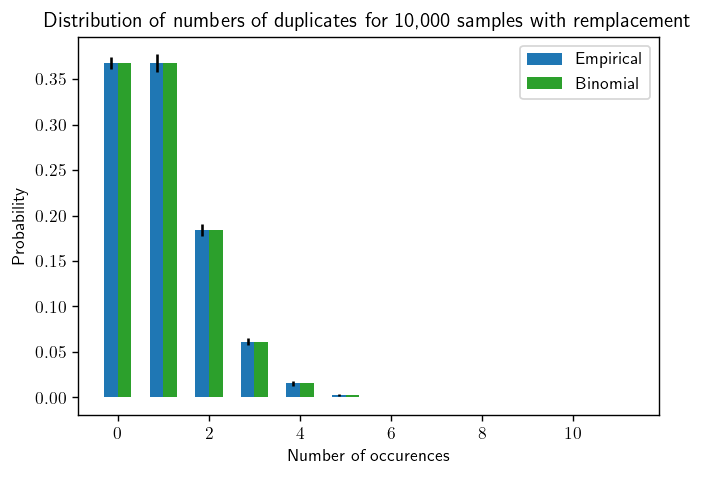

In [3]:
width = 0.3
stds = np.std(freqs, axis=0)

#

plt.figure(dpi=125)

plt.bar(np.arange(max_len) - width/2, np.mean(freqs, axis=0), yerr=2*stds, color='tab:blue', width=width, label='Empirical')
plt.bar(np.arange(max_len) + width/2, probs, color='tab:green', width=width, label='Binomial')

plt.xlabel("Number of occurences")
plt.ylabel("Probability")
plt.title(f"Distribution of numbers of duplicates for {n:,} samples with remplacement")
plt.legend()

plt.show()